In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/spam.csv",encoding = 'latin-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
10738,ham,put the 10 on the ft\r\nthe transport volumes...,NaN,NaN,NaN
10739,ham,3 / 4 / 2000 and following noms\r\nhpl can ' ...,NaN,NaN,NaN
10740,ham,calpine daily gas nomination\r\n>\r\n>\r\njul...,NaN,NaN,NaN
10741,ham,industrial worksheets for august 2000 activit...,NaN,NaN,NaN


In [5]:
df.shape

(10743, 5)

In [6]:
# 1. Data cleaning Process
df.drop( columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,put the 10 on the ft\r\nthe transport volumes...
10739,ham,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,ham,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,ham,industrial worksheets for august 2000 activit...


In [8]:
df.sample(3)

,v1,v2
4213,ham,Ard 530 like dat lor. We juz meet in mrt stati...
9482,ham,maintenance work at meters 584 & 6040\r\nper ...
2992,ham,So i'm doing a list of buyers.


In [9]:
#rename
df.rename(columns = {'v1' :'target','v2':'text'}, inplace = True)

In [10]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,put the 10 on the ft\r\nthe transport volumes...
10739,ham,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,ham,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,ham,industrial worksheets for august 2000 activit...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,0,put the 10 on the ft\r\nthe transport volumes...
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,0,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,0,industrial worksheets for august 2000 activit...


In [14]:
# check missing value

df.isna().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

581

In [16]:
df.drop_duplicates(keep = 'first' , inplace = True)

In [17]:
df.shape

(10162, 2)

In [18]:
df.duplicated().sum()

0

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    8047
1    2115
Name: target, dtype: int64

In [21]:
import matplotlib.pyplot as plt

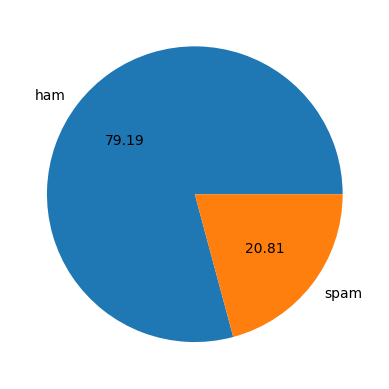

In [22]:
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df['num_character']=df['text'].apply(len)

In [26]:
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861
10738,0,put the 10 on the ft\r\nthe transport volumes...,526
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106
10741,0,industrial worksheets for august 2000 activit...,565


In [27]:
df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)

In [28]:
df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [29]:
df

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861,195,9
10738,0,put the 10 on the ft\r\nthe transport volumes...,526,154,7
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106,304,13
10741,0,industrial worksheets for august 2000 activit...,565,110,20


In [30]:
df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,10162.000000,10162.000000,10162.000000
mean,561.694450,123.220527,7.577249
std,1191.658714,261.691005,20.438804
min,2.000000,0.000000,0.000000
25%,55.250000,14.000000,1.000000
50%,142.000000,30.500000,3.000000
75%,532.000000,120.000000,7.000000
max,32250.000000,8861.000000,1204.000000


In [31]:
df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,8047.000000,8047.000000,8047.000000
mean,472.608053,109.882068,6.138934
std,1035.363196,246.858760,17.504968
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,104.000000,25.000000,2.000000
75%,426.000000,102.000000,6.000000
max,32250.000000,8861.000000,1204.000000


In [32]:
df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,2115.000000,2115.000000,2115.000000
mean,900.643972,173.969740,13.049645
std,1612.562568,306.544391,28.351355
min,3.000000,0.000000,0.000000
25%,149.000000,29.000000,3.000000
50%,323.000000,65.000000,5.000000
75%,855.500000,172.000000,13.000000
max,22065.000000,3961.000000,693.000000


In [33]:
import seaborn as sns

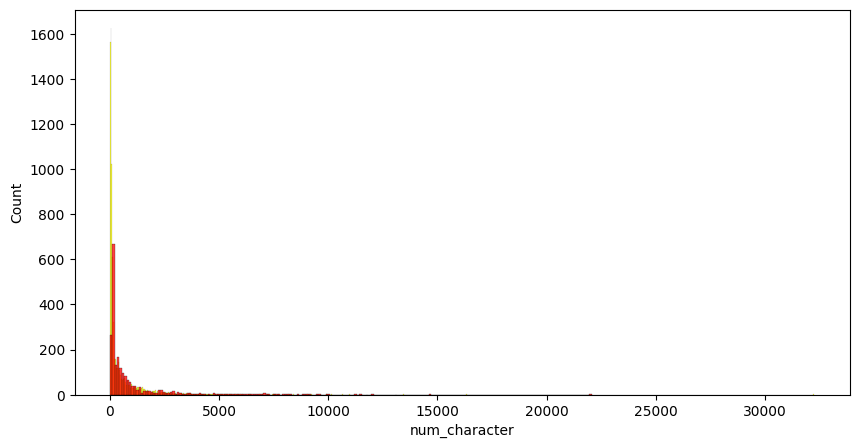

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_character'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_character'] , color = 'red')
plt.show()

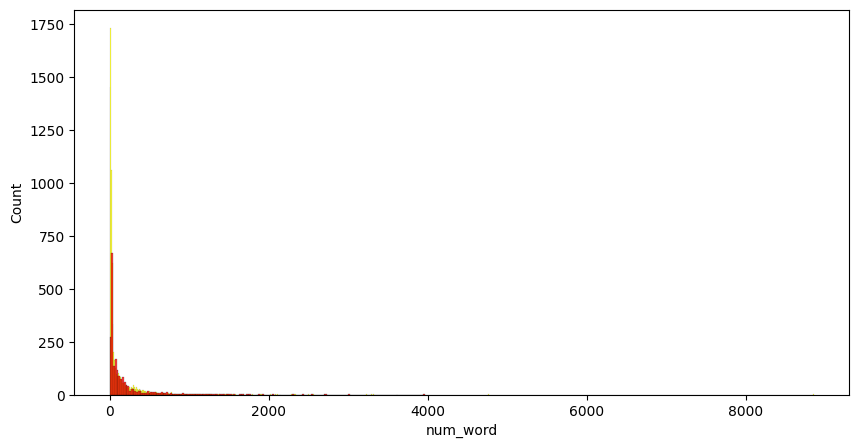

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_word'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_word'] , color = 'red')
plt.show()

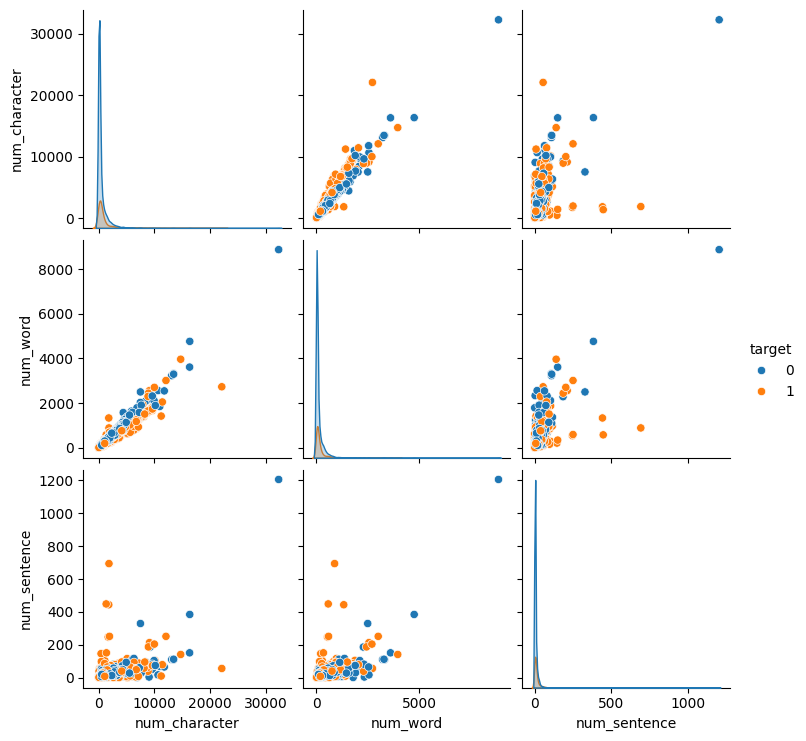

In [36]:
sns.pairplot(df,hue= ('target'))
plt.show()

<Axes: >

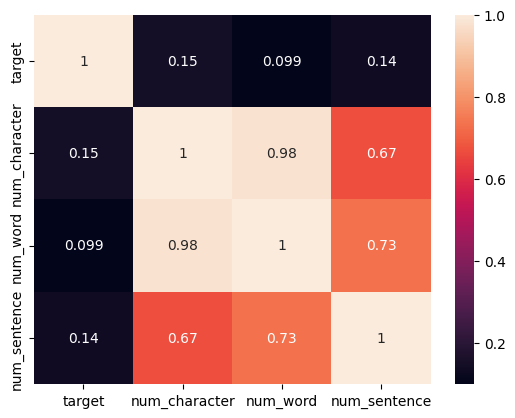

In [37]:
#to see correlation matrix
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr() , annot = True)

In [42]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()

    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)


    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
transform_text('HI Somu MY sely  Ak?!')

'hi somu seli ak'

In [44]:
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
ps.stem('danceing')

'danc'

In [46]:
df['transform_text']=df['text'].apply(transform_text)

In [47]:
df#

,target,text,num_character,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861,195,9,fw crosstex energi driscol ranch 1 3 meter no ...
10738,0,put the 10 on the ft\r\nthe transport volumes...,526,154,7,put 10 ft transport volum decreas 25000 10000 ...
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106,304,13,3 4 2000 follow nom hpl take extra 15 mmcf wee...
10741,0,industrial worksheets for august 2000 activit...,565,110,20,industri worksheet august 2000 activ attach wo...


In [48]:
#word cloud

from wordcloud import WordCloud
wc= WordCloud(width = 700 , height = 700 , min_font_size = 10 ,background_color = 'yellow')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = ' '))

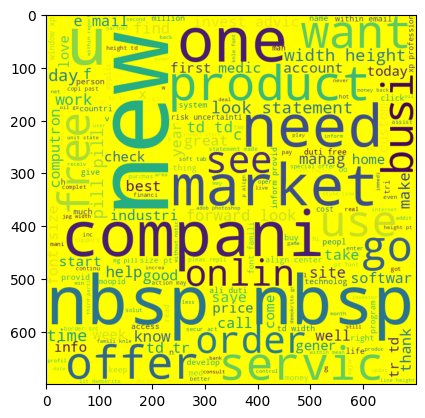

In [50]:
plt.imshow(spam_wc)

In [51]:
#word cloud for ham

ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = ' '))

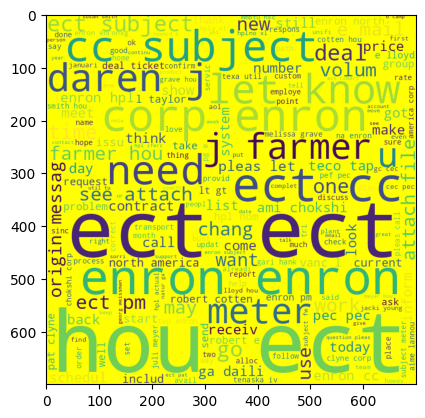

In [52]:
plt.imshow(ham_wc)

In [53]:
#top 50 words

spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

205069

In [55]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,3,1249
1,2,1008
2,http,999
3,com,989
4,compani,921
5,price,746
6,1,738
7,0,690
8,e,633
9,get,621


In [56]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

412348

In [58]:
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,ect,13690
1,hou,7174
2,enron,6442
3,2000,4210
4,deal,3492
5,ga,2798
6,pleas,2749
7,com,2714
8,meter,2709
9,subject,2679


In [59]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [60]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [61]:
X.shape

(10162, 45520)

In [62]:
y = df['target'].values

In [63]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 2 )

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8991637973438269
[[1488  136]
 [  69  340]]
0.7142857142857143


In [69]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8908017707820954
[[1624    0]
 [ 222  187]]
1.0


In [70]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8706345302508608
[[1585   39]
 [ 224  185]]
0.8258928571428571


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier , ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [73]:
df['transform_text'][4532]

'gr8 new servic live sex video chat mob see sexiest dirtiest girl live ur phone 4 detail text horni 89070 cancel send stop 89070'

In [74]:
df.sample(10)

,target,text,num_character,num_word,num_sentence,transform_text
3706,0,Aight do you still want to get money,36,8,1,aight still want get money
6197,0,re : fyi - wellhead portfolio\r\nwho is consi...,1254,292,13,fyi wellhead portfolio consid greg sharp orig ...
1751,0,* Was thinking about chuckin ur red green n bl...,92,18,1,think chuckin ur red green n black trainner 2 ...
6259,1,"\r\nhe [ llqyo\r\nde = ar home owner ,\r\nwe\...",608,148,11,llqyo de ar home owner notifix 3 oujkr mfgortg...
10687,0,"enron / hpl actuals for august 18 - 20 , 2000...",348,92,10,enron hpl actual august 18 20 2000 august 18 2...
6647,0,re : apache deal 384247 10 / 00\r\nplease fol...,1020,234,14,apach deal 384247 10 00 pleas follow current p...
5611,0,lst rev feb . 2000 josey ranch nom\r\n- - - -...,770,214,4,lst rev feb 2000 josey ranch nom forward susan...
1455,1,Summers finally here! Fancy a chat or flirt wi...,159,33,5,summer final fanci chat flirt sexi singl yr ar...
7176,0,re : apache deal 384247 10 / 00\r\naccording ...,706,162,13,apach deal 384247 10 00 accord contract brief ...
413,0,Bring home some Wendy =D,24,5,1,bring home wendi
